<a href="https://colab.research.google.com/github/andrnha/Intelligente_systemer/blob/master/Intelligente_Systemer_HWA_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data shape: (400, 4096)
Label shape: (400,)


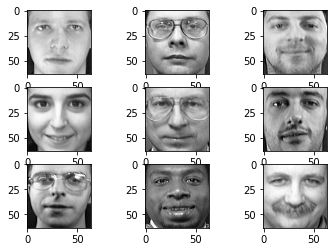

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.olivetti_faces import fetch_olivetti_faces
#Fetch data and have a look
faces = fetch_olivetti_faces()
x, y = faces['data'], faces['target']
print(f'Data shape: {x.shape}')
print(f'Label shape: {y.shape}')
# (400, 4096)
# (400,)

# create a grid of 3x3 images
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x[30*i].reshape(64, 64))

# show the plot
plt.show()

# SCALE JUST IN CASE
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(faces.data)
#X_scaled = scaler.transform(faces.data)

# divide data into training, ???validation??? and testing (shuffle)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y, random_state=0)

Data shape: (400, 4096)
Label shape: (400,)


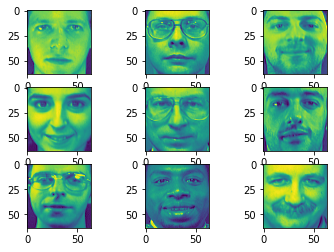

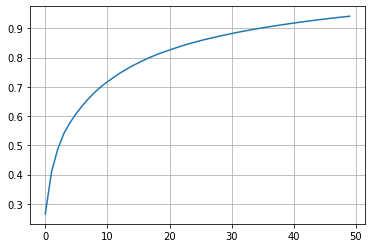

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_layer1 (Dense)       (None, 1024)              4195328   
_________________________________________________________________
encoder_layer2 (Dense)       (None, 512)               524800    
_________________________________________________________________
encoder_layer3 (Dense)       (None, 64)                32832     
_________________________________________________________________
decoder_layer1 (Dense)       (None, 512)               33280     
_________________________________________________________________
decoder_layer2 (Dense)       (None, 1024)              525312    
_________________________________________________________________
decoder_layer3 (Dense)       (None, 4096)              4198400   
Total params: 9,509,952
Trainable params: 9,509,952
Non-trainable params: 0
____________________________________________

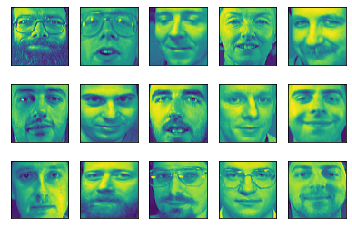

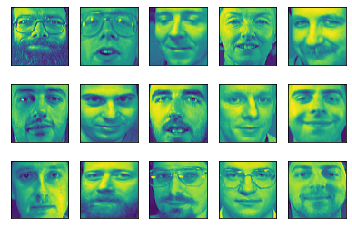

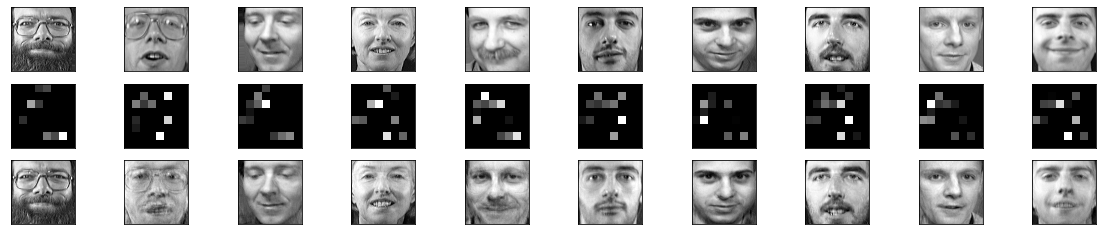

In [3]:
# use PCA for diensionality reduction - reconstruct images using a subset of features
from sklearn.decomposition import PCA
number_of_components=int(y.size*0.25/2)

pca = PCA(n_components=number_of_components, whiten=True, random_state=0).fit(x)
x_reduced = pca.fit_transform(X_test)
x_recovered = pca.inverse_transform(x_reduced)

cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure()
plt.plot(range(len(cumsum)), cumsum)
plt.grid()
plt.show()

def disp_digits(x):
  fig, ax = plt.subplots(3,5)
  ax = ax.flatten()
  ims = []
  for i in range(len(ax)):
    ax[i].imshow(X_test[i].reshape(64,64), interpolation='nearest', animated=True)
    #ax[i].set_title(str(y[i]))
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)

disp_digits(X_test)
disp_digits(x_recovered)

# use autoencoder - reconstruct using a compressed representation (code)
# https://blog.keras.io/building-autoencoders-in-keras.html
import keras
from keras import layers
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Activation, Dropout
init_inputs = 64*64
autoencoder = Sequential()
autoencoder.add(Dense(units = init_inputs/4, activation='relu', input_dim = init_inputs, name='encoder_layer1'))
autoencoder.add(Dense(units = init_inputs/8, activation='relu', input_dim = init_inputs/4, name='encoder_layer2'))
autoencoder.add(Dense(units = init_inputs/64, activation='relu', input_dim = init_inputs/8, name='encoder_layer3'))

autoencoder.add(Dense(units = init_inputs/8, activation='relu', name='decoder_layer1'))
autoencoder.add(Dense(units = init_inputs/4, activation='relu', name='decoder_layer2'))
autoencoder.add(Dense(units = init_inputs  , activation='sigmoid', name='decoder_layer3'))

autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

autoencoder.summary()
history = autoencoder.fit(x = X_train, y= X_train, epochs=1000, batch_size=32, shuffle=True,\
                    validation_data=(X_train, X_train), verbose=1)

from tensorflow.keras.utils import plot_model
plot_model(autoencoder, to_file='AE_plot.png', show_shapes=True, show_layer_names=True)

from IPython.display import Image 
Image('AE_plot.png')

# test trained autoencoder
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.layers[2].output)
encoded_imgs = encoder.predict(X_test)

print(encoded_imgs.shape)

# retrieve the last layer of the autoencoder model

encoded_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[3](encoded_input)
decoder_layer = autoencoder.layers[4](decoder_layer)
decoder_layer = autoencoder.layers[5](decoder_layer)

decoder = Model(inputs = encoded_input, outputs = decoder_layer)

decoded_imgs = decoder.predict(encoded_imgs)

print(encoded_imgs.shape)

predicted_imgs = autoencoder.predict(X_test, verbose=1)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 8))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 27871.727
start iteration
done sorting
end inner loop
Iteration 1, inertia 26298.271
start iteration
done sorting
end inner loop
Iteration 2, inertia 26021.99
start iteration
done sorting
end inner loop
Iteration 3, inertia 25797.434
start iteration
done sorting
end inner loop
Iteration 4, inertia 25656.389
start iteration
done sorting
end inner loop
Iteration 5, inertia 25637.064
start iteration
done sorting
end inner loop
Iteration 6, inertia 25604.004
start iteration
done sorting
end inner loop
Iteration 7, inertia 25563.371
start iteration
done sorting
end inner loop
Iteration 8, inertia 25522.969
start iteration
done sorting
end inner loop
Iteration 9, inertia 25490.777
start iteration
done sorting
end inner loop
Iteration 10, inertia 25476.387
start iteration
done sorting
end inner loop
Iteration 11, inertia 25476.387
center shift 0.000000e+00 within tolerance 3.671772e-04
Initialization comp

<Figure size 576x576 with 0 Axes>

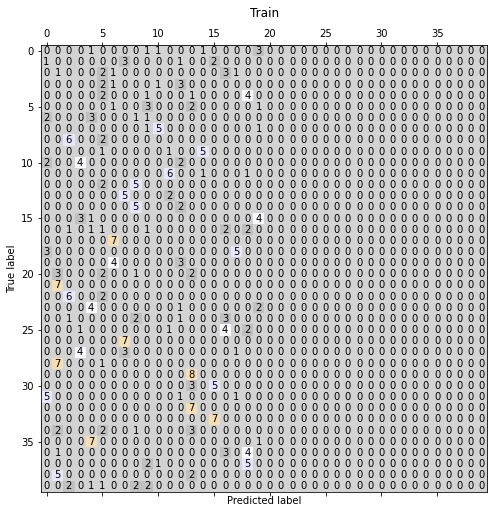

<Figure size 576x576 with 0 Axes>

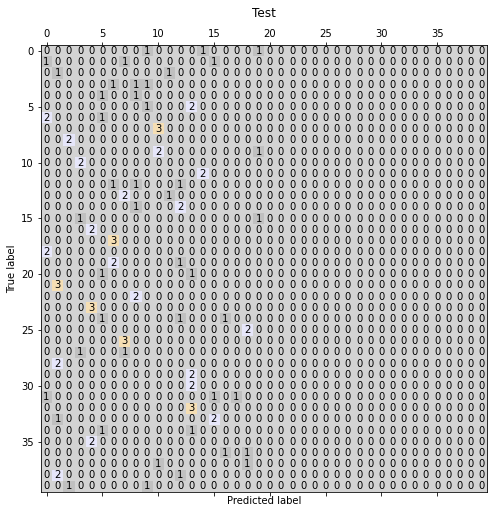

In [14]:
# unsupervised algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=10000, algorithm = 'auto', verbose=1)

encoded_imgs = encoder.predict(X_train)
kmeans.fit(encoded_imgs)

#Predict the response for test dataset
encoded_imgs = encoder.predict(X_test)
ypred = kmeans.predict(encoded_imgs)

#kmeans.fit(X_train)
#trainpred = kmeans.predict(X_train)
#pred = kmeans.predict(X_test)

#confusion matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])
plt.rcParams["figure.figsize"] = (8,8)
def cm(ytest, ypred, title):
  cm = confusion_matrix(ytest, ypred)

  plt.figure()
  plt.matshow(cm, cmap=cmap)
  
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  
  plt.title(title)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

cm(y_train, kmeans.predict(encoder.predict(X_train)), title='Train')
cm(y_test, kmeans.predict(encoder.predict(X_test)), title='Test')

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training set score: 1.00
Testing set score: 0.94


<Figure size 576x576 with 0 Axes>

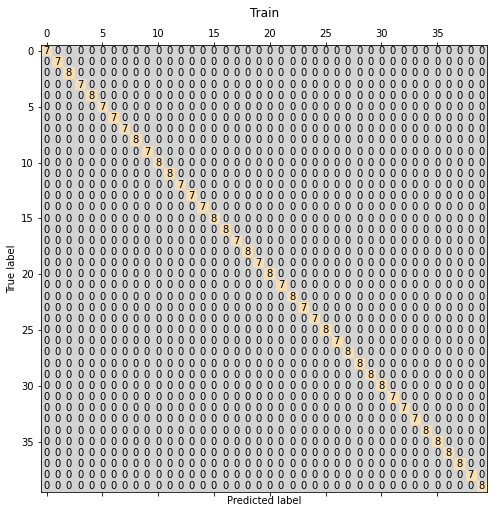

<Figure size 576x576 with 0 Axes>

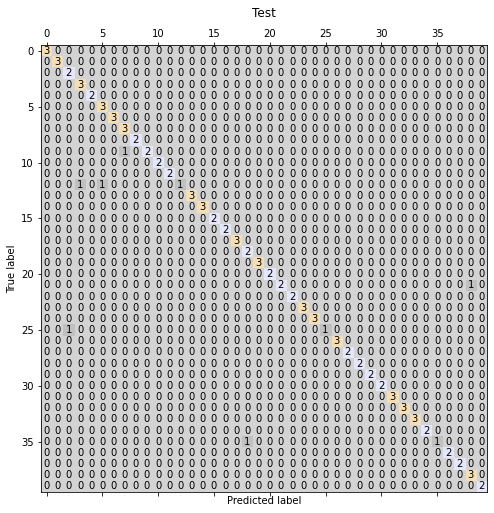

In [18]:
# supervised algorithm
from sklearn.svm import LinearSVC
lsvc = LinearSVC().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lsvc.score(X_train, y_train)))
print('Testing set score: {:.2f}'.format(lsvc.score(X_test, y_test)))

# confusion matrix
cm(y_train, lsvc.predict(X_train), title='Train')
cm(y_test, lsvc.predict(X_test), title='Test')

[36  1  2 18 24 15  8 10 20 18 23 25 16  5  6 27  3 13 23  6  1 23 24 38
 11  5 34 34  1  3 37 20 31 24 18 25  3  3 11 19 39  7  4 29 19 17 26 27
  0 14  1 38  8 21  5 38 36  0 15 29 13 33 28 16 33 39 13  7 13 13 30 38
  0 21 19 17 26 32 32 33 37  9  3  6 28 10  7 32 34 19 18  9 19 12 14 14
  4  3 26 35]


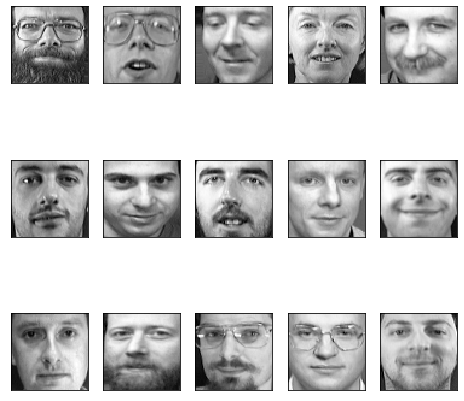

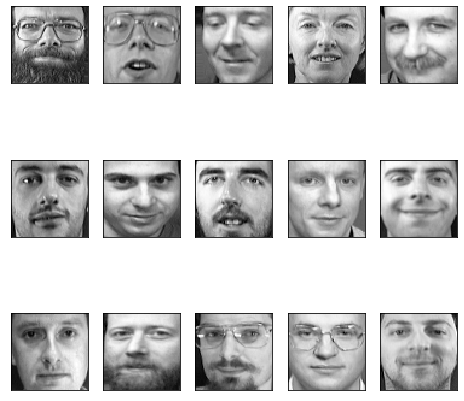

In [32]:
#cross-validation  - SGD, BGD and MBGD
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
sgd = SGDClassifier(max_iter=10000, tol=1e-3).fit(X_train,y_train)
print(sgd.predict(X_test))
disp_digits(sgd.predict(X_test)[3])
disp_digits(y_test[3])